# **CSUID : 2864923**
## **Name : Dinky Mishra**

###                                                    **DATA MINING LAB1: PART 3 & PART 4**





# PART 3: Calculating Proximity of Two Binary Object Vectors With Simple Matching, Jaccard Similarity, Cosine Similarity & Part 4: Correlation Analysis to Discover Any Relationship between Any Two Features by Building a Correlation Matrix

## Importing Required Librarries, Mounting Google Drive & Loading data in pandas dataframe

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date
from scipy.spatial import distance


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vTargetBuyerBinarization.csv', encoding='latin1')

In [ ]:
data.head(15)

,CustomerKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age,BikeBuyer,M,S,...,Male,Firstpurchased,Europe,North America,Pacific,0-1 Miles,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles
0,11000,90000,2,0,1,0,49,1,1,0,...,1,18,0,0,1,0,1,0,0,0
1,11001,60000,3,3,0,1,50,1,0,1,...,1,18,0,0,1,1,0,0,0,0
2,11002,60000,3,3,1,1,50,1,1,0,...,1,18,0,0,1,0,0,0,1,0
3,11003,70000,0,0,0,1,47,1,0,1,...,0,18,0,0,1,0,0,0,0,1
4,11004,80000,5,5,1,4,47,1,0,1,...,0,18,0,0,1,0,1,0,0,0
5,11005,70000,0,0,1,1,50,1,0,1,...,1,18,0,0,1,0,0,0,0,1
6,11006,70000,0,0,1,1,49,1,0,1,...,0,18,0,0,1,0,0,0,0,1
7,11007,60000,3,3,1,2,51,1,1,0,...,1,18,0,0,1,1,0,0,0,0
8,11008,60000,4,4,1,3,51,1,0,1,...,0,18,0,0,1,0,0,1,0,0
9,11009,70000,0,0,0,1,51,1,0,1,...,1,18,0,0,1,0,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   CustomerKey           18484 non-null  int64
 1   YearlyIncome          18484 non-null  int64
 2   TotalChildren         18484 non-null  int64
 3   NumberChildrenAtHome  18484 non-null  int64
 4   HouseOwnerFlag        18484 non-null  int64
 5   NumberCarsOwned       18484 non-null  int64
 6   Age                   18484 non-null  int64
 7   BikeBuyer             18484 non-null  int64
 8   M                     18484 non-null  int64
 9   S                     18484 non-null  int64
 10  Bachelors             18484 non-null  int64
 11  Graduate Degree       18484 non-null  int64
 12  High School           18484 non-null  int64
 13  Partial College       18484 non-null  int64
 14  Partial High School   18484 non-null  int64
 15  Clerical              18484 non-null  int64
 16  Mana

##Make sure that all the attributes are transformed in a same scale in normalization at the end for all the numeric attributes, all the categorical (nominal) attributes, and all the discretized numeric attribute.


In [ ]:
# Normalize the YearlyIncome column
data['YearlyIncome_normalized'] = (data['YearlyIncome'] - data['YearlyIncome'].min()) / (data['YearlyIncome'].max() - data['YearlyIncome'].min())

In [ ]:
#Normalized Total Childresn col
data['TotalChildren_normalized'] = (data['TotalChildren'] - data['TotalChildren'].min()) / (data['TotalChildren'].max() - data['TotalChildren'].min())

In [ ]:
# Normalize the NumberChildrenAtHome column
data['NumberChildrenAtHome_normalized'] = (data['NumberChildrenAtHome'] - data['NumberChildrenAtHome'].min()) / (data['NumberChildrenAtHome'].max() - data['NumberChildrenAtHome'].min())

In [ ]:
# Normalize the Age column
data['Age_normalized'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min())

In [ ]:
# Normalize the Firstpurchased column
data['Firstpurchased_normalized'] = (data['Firstpurchased'] - data['Firstpurchased'].min()) / (data['Firstpurchased'].max() - data['Firstpurchased'].min())

In [ ]:
# Drop the non-normalized columns
data = data.drop(columns=['YearlyIncome', 'TotalChildren','NumberChildrenAtHome', 'Age', 'Firstpurchased'])


In [60]:
#printing the dataframe to ensure the normalized changes
data.head(2)

,CustomerKey,HouseOwnerFlag,NumberCarsOwned,BikeBuyer,M,S,Bachelors,Graduate Degree,High School,Partial College,...,0-1 Miles,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles,YearlyIncome_normalized,TotalChildren_normalized,NumberChildrenAtHome_normalized,Age_normalized,Firstpurchased_normalized
0,11000,1,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0.5000,0.4,0.0,0.211268,1.0
1,11001,0,1,1,0,1,1,0,0,0,...,1,0,0,0,0,0.3125,0.6,0.6,0.225352,1.0


In [61]:
#Saving the normalized dataframe to csv
data.to_csv('Lab1_part2&3_normalized_data.csv', index=False)

In [ ]:
#Loading the data dataframe to df
df =pd.DataFrame(data)

##Calculate a Similarity measure between a pair of two objects below from your transformed input data based on the following measures in:
1.   Simple Matching
2.   Extended Jaccard Similarity
3.   Cosine Similarity


##Use the CustomerKey column value to locate two object vectors to compare. You should NOT include the CustomerKey column as a part of the feature vector.

1) Similarity between two vectors of (CustomerKey = 11000) and (CustomerKey =
11001)
2) Similarity between two vectors of (CustomerKey = 11000) and (CustomerKey =
11012)

In [ ]:
#Extracting data of CustomerKey : 11000,11001 and 11012
# Set the index to 'ID'
df.set_index('CustomerKey', inplace=True)

# Extract specific rows based on indices
indices_to_extract = [11000, 11001, 11012]
extracted_data = df.loc[indices_to_extract]

# Convert the extracted data to the desired dictionary format
extracted_dict = extracted_data.T.to_dict('list')
print(extracted_dict)

{11000: [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.5, 0.4, 0.0, 0.2112676056338028, 1.0], 11001: [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.3125, 0.6, 0.6, 0.22535211267605634, 1.0], 11012: [1.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.5625, 0.4, 0.0, 0.18309859154929578, 0.3333333333333333]}


In [ ]:
# Extracted data from the normalized_data
data ={11000: [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.5, 0.4, 0.0, 0.2112676056338028, 1.0], 11001: [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.3125, 0.6, 0.6, 0.22535211267605634, 1.0], 11012: [1.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.5625, 0.4, 0.0, 0.18309859154929578, 0.3333333333333333]}

In [ ]:
def simple_matching(A, B):
    return np.sum(np.array(A) == np.array(B)) / len(A)

def extended_jaccard(A, B):
    A, B = np.array(A), np.array(B)
    return np.dot(A, B) / (np.sum(A**2) + np.sum(B**2) - np.dot(A, B))

def cosine_similarity(A, B):
    A, B = np.array(A), np.array(B)
    return np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))

In [ ]:
pairs = [(11000, 11001), (11000, 11012)]

# Print table header
print(f"{'Pair':<20} {'Simple Matching':<20} {'Extended Jaccard':<20} {'Cosine Similarity':<20}")
print("="*80)

# Loop through the pairs and compute similarities
for pair in pairs:
    A, B = data[pair[0]], data[pair[1]]

    # Compute the similarity metrics
    simple_match = simple_matching(A, B)
    extended_jac = extended_jaccard(A, B)
    cosine_sim = cosine_similarity(A, B)

In [ ]:

# Print the results in a tabular format
    print(f"{pair[0]} and {pair[1]:<15} {simple_match:<20} {extended_jac:<20} {cosine_sim:<20}")


Pair                 Simple Matching      Extended Jaccard     Cosine Similarity   
11000 and 11001           0.6666666666666666   0.5003301823303288   0.6671130864210062  
11000 and 11012           0.6333333333333333   0.2959749532211065   0.4591926950975777  


## Proximity of 2 binary object vectors
1.   Simple Matching (Hamming Distance)
2.   Jaccard similarity
3.   Cosine similarity


In [ ]:
# For Proximity of 2 binary object vectors
# Importing distance and bifurcatting binary vector.
from scipy.spatial import distance
from scipy.spatial.distance import hamming
from sklearn.metrics import jaccard_score


# Binary vectors for the given objects
object_vectors = {
    11000: np.array([1, 0, 1, 1, 0]),
    11001: np.array([1, 1, 0, 1, 0]),
    11012: np.array([1, 0, 1, 0, 1]),
}

# Pair 1 comman: CustomerKey 11000 and CustomerKey 11001
key1 = 11000
key2 = 11001
vector1 = object_vectors[key1]
vector2 = object_vectors[key2]

# Pair 2 : CustomerKey 11000 and CustomerKey 11012
key3 = 11000
key4 = 11012
vector3 = object_vectors[key3]
vector4 = object_vectors[key4]

In [ ]:
#Simple Matching(Hamming Distance) pair 1:
hamming_distance = hamming(vector1, vector2) * len(vector1)
print(f"Simple Matching (Hamming Distance) between {key1} and {key2}: {hamming_distance}")

Simple Matching (Hamming Distance) between 11000 and 11001: 2.0


In [ ]:
#Simple Matching (Hamming Distance) pair 2:
hamming_distance = hamming(vector3, vector4) * len(vector3)
print(f"Simple Matching (Hamming Distance) between {key3} and {key4}: {hamming_distance}")

Simple Matching (Hamming Distance) between 11000 and 11012: 2.0


In [ ]:
# Jaccards Similarity for pair 1
jaccard_similarity = jaccard_score(vector1, vector2)
print(f"Jaccard similarity between {key1} and {key2}: {jaccard_similarity}")

Jaccard similarity between 11000 and 11001: 0.5


In [ ]:
# Jaccards Similarity for pair 2
jaccard_similarity = jaccard_score(vector3, vector4)
print(f"Jaccard similarity between {key3} and {key4}: {jaccard_similarity}")

Jaccard similarity between 11000 and 11012: 0.5


In [ ]:
# Calculate Cosine Similarity pair 1
cosine_similarity = 1 - distance.cosine(vector1, vector2)
print(f"Cosine Similarity between {key1} and {key2}: {cosine_similarity}")

Cosine Similarity between 11000 and 11001: 0.6666666666666666


In [ ]:
# Calculate Cosine Similarity pair 2
cosine_similarity = 1 - distance.cosine(vector3, vector4)
print(f"Cosine Similarity between {key3} and {key4}: {cosine_similarity}")

Cosine Similarity between 11000 and 11012: 0.6666666666666666


### ***Part 4: Correlation Analysis to Discover Any Relationship between Any Two Features by Building a Correlation Matrix ***

## 1: Build a Correlation Matrix for Every Pair of the Features for the entire Data Set

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date
from scipy.spatial import distance


merged_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vTargetBuyerBinarization.csv', encoding='latin1')

# Function to calculate the mean of a list
def mean(numbers):
    return sum(numbers) / len(numbers)

# Function to calculate the correlation between two lists
def correlation(x, y):
    mean_x = mean(x)
    mean_y = mean(y)

    num = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denom_x = sum((xi - mean_x) ** 2 for xi in x)
    denom_y = sum((yi - mean_y) ** 2 for yi in y)

    correlation = num / ((denom_x * denom_y) ** 0.5)
    return correlation

# Get the column names of the DataFrame
columns = merged_data.columns

# Initialize the correlation matrix with zeros
correlation_matrix = [[0] * len(columns) for _ in range(len(columns))]

# Calculate correlations and fill in the matrix
for i in range(len(columns)):
    for j in range(i, len(columns)):
        if i == j:
            correlation_matrix[i][j] = 1.0  # Correlation with itself is 1
        else:
            x = merged_data[columns[i]].tolist()
            y = merged_data[columns[j]].tolist()
            corr = correlation(x, y)
            correlation_matrix[i][j] = corr
            correlation_matrix[j][i] = corr  # Correlation matrix is symmetric

# Creating a DataFrame from the correlation matrix with column and row labels
correlation_df = pd.DataFrame(correlation_matrix, columns=columns, index=columns)

# Printing the correlation DataFrame
print(correlation_df)

                      CustomerKey  YearlyIncome  TotalChildren  \
CustomerKey              1.000000     -0.055687      -0.006077   
YearlyIncome            -0.055687      1.000000       0.215923   
TotalChildren           -0.006077      0.215923       1.000000   
NumberChildrenAtHome    -0.019974      0.452133       0.461224   
HouseOwnerFlag          -0.124755      0.045714       0.185742   
NumberCarsOwned          0.005704      0.466647       0.265405   
Age                     -0.014086      0.163733       0.515857   
BikeBuyer                0.005804      0.043551      -0.127152   
M                       -0.071573      0.103691       0.159140   
S                        0.071573     -0.103691      -0.159140   
Bachelors               -0.014377      0.140257       0.014915   
Graduate Degree         -0.043565      0.124323       0.018148   
High School              0.023922     -0.119084       0.029873   
Partial College         -0.014094     -0.039852      -0.034743   
Partial Hi

In [64]:
correlation_df.head()

,CustomerKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age,BikeBuyer,M,S,...,Male,Firstpurchased,Europe,North America,Pacific,0-1 Miles,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles
CustomerKey,1.000000,-0.055687,-0.006077,-0.019974,-0.124755,0.005704,-0.014086,0.005804,-0.071573,0.071573,...,0.013862,-0.167939,0.002024,0.003294,-0.006502,-0.008040,0.015603,0.004891,-0.003196,-0.006783
YearlyIncome,-0.055687,1.000000,0.215923,0.452133,0.045714,0.466647,0.163733,0.043551,0.103691,-0.103691,...,-0.001965,0.060288,-0.272599,0.164674,0.106966,-0.170479,-0.103551,0.262996,0.007865,0.072109
TotalChildren,-0.006077,0.215923,1.000000,0.461224,0.185742,0.265405,0.515857,-0.127152,0.159140,-0.159140,...,-0.004935,-0.084257,-0.067692,0.112925,-0.064460,-0.089151,-0.023846,0.176211,-0.011184,-0.012195
NumberChildrenAtHome,-0.019974,0.452133,0.461224,1.000000,0.130797,0.424191,0.005108,-0.086707,0.079681,-0.079681,...,-0.002625,-0.020278,0.073251,-0.125023,0.073321,-0.004616,-0.137799,0.227645,-0.015816,-0.045472
HouseOwnerFlag,-0.124755,0.045714,0.185742,0.130797,1.000000,-0.057983,0.109117,0.007494,0.323249,-0.323249,...,-0.004562,0.016145,-0.025050,0.055257,-0.040871,-0.143853,-0.151003,0.126970,0.062582,0.154121




## 2. Visualize Your Correlation Matrix of All the Features in a Heat Map.


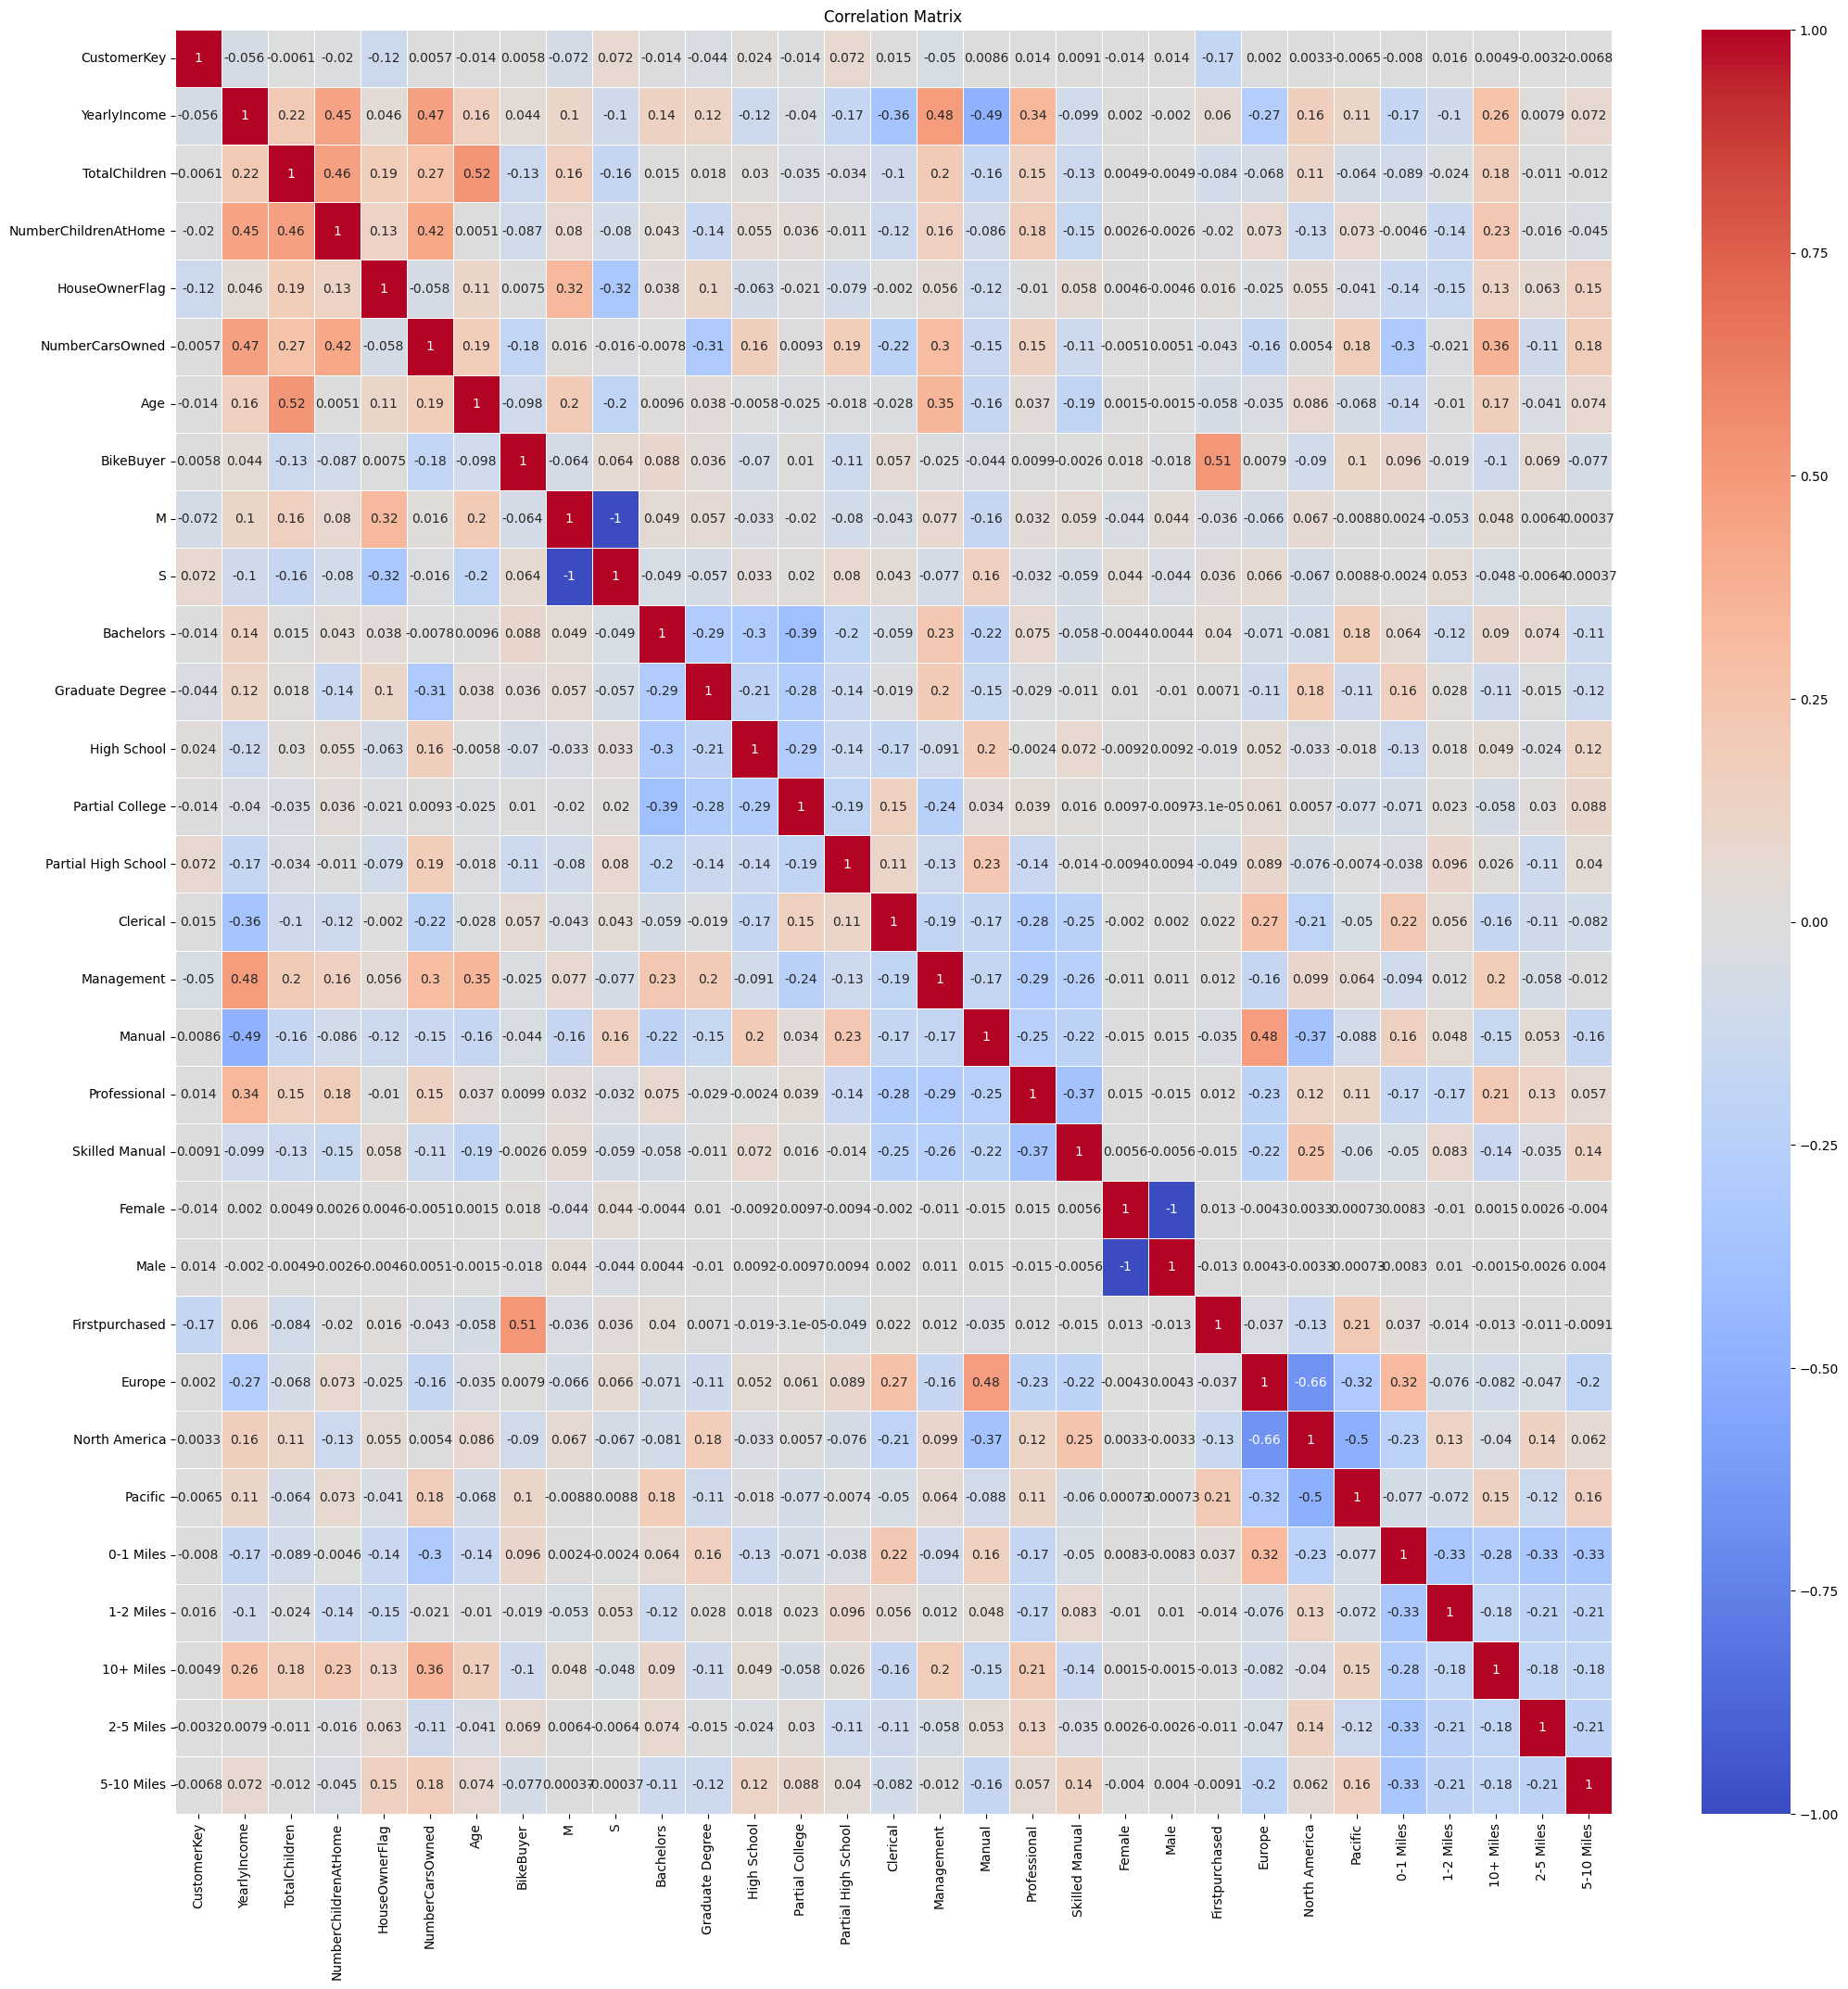

In [65]:
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## 3.Divide your data set into two data sets: One with Bike Buyer = 1 and the other set with Bike Buyer = 0


In [66]:
bike_buyer_1 = merged_data[merged_data['BikeBuyer'] == 1]
bike_buyer_0 = merged_data[merged_data['BikeBuyer'] == 0]

In [67]:
bike_buyer_1.head()

,CustomerKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age,BikeBuyer,M,S,...,Male,Firstpurchased,Europe,North America,Pacific,0-1 Miles,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles
0,11000,90000,2,0,1,0,49,1,1,0,...,1,18,0,0,1,0,1,0,0,0
1,11001,60000,3,3,0,1,50,1,0,1,...,1,18,0,0,1,1,0,0,0,0
2,11002,60000,3,3,1,1,50,1,1,0,...,1,18,0,0,1,0,0,0,1,0
3,11003,70000,0,0,0,1,47,1,0,1,...,0,18,0,0,1,0,0,0,0,1
4,11004,80000,5,5,1,4,47,1,0,1,...,0,18,0,0,1,0,1,0,0,0


In [68]:
bike_buyer_0.head()

,CustomerKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age,BikeBuyer,M,S,...,Male,Firstpurchased,Europe,North America,Pacific,0-1 Miles,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles
12,11012,100000,2,0,1,2,47,0,1,0,...,0,16,0,1,0,0,1,0,0,0
13,11013,100000,2,0,1,3,47,0,1,0,...,1,15,0,1,0,1,0,0,0,0
14,11014,100000,3,0,0,3,47,0,0,1,...,0,16,0,1,0,0,1,0,0,0
19,11019,40000,0,0,0,2,37,0,0,1,...,1,16,0,1,0,0,0,0,0,1
23,11023,40000,0,0,1,1,36,0,1,0,...,1,16,0,1,0,0,1,0,0,0


## 4.Then build a Correlation Matrix for Every pair of the Features for the record set with Bike Buyer = 1 and the other record set with Bike Buyer = 0 respectively.

In [69]:
# Calculate the correlation matrix for Bike Buyer = 1
def mean(numbers):
    return sum(numbers) / len(numbers)

# Function to calculate the correlation between two lists
def correlation(x, y):
    mean_x = mean(x)
    mean_y = mean(y)

    num = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denom_x = sum((xi - mean_x) ** 2 for xi in x)
    denom_y = sum((yi - mean_y) ** 2 for yi in y)

    # Check if denominators are close to zero (using a small epsilon value)
    epsilon = 1e-10
    if abs(denom_x) < epsilon or abs(denom_y) < epsilon:
        return 0.0  # Return 0 when denominators are close to zero
    else:
        correlation = num / ((denom_x * denom_y) ** 0.5)
        return correlation

# Get the column names of the DataFrame
columns = bike_buyer_1.columns

# Initialize the correlation matrix with zeros
num_columns = len(columns)
correlation_matrix_1 = pd.DataFrame(index=columns, columns=columns)

# Calculate correlations and fill in the matrix
for i in range(num_columns):
    for j in range(i, num_columns):
        x = bike_buyer_1.iloc[:, i].tolist()
        y = bike_buyer_1.iloc[:, j].tolist()
        corr = correlation(x, y)
        correlation_matrix_1.iloc[i, j] = corr
        correlation_matrix_1.iloc[j, i] = corr  # Correlation matrix is symmetric

# Print the correlation matrix with column and row names
print(correlation_matrix_1)

                     CustomerKey YearlyIncome TotalChildren  \
CustomerKey                  1.0    -0.076235     -0.047832   
YearlyIncome           -0.076235          1.0      0.148858   
TotalChildren          -0.047832     0.148858           1.0   
NumberChildrenAtHome   -0.050032     0.430453      0.343671   
HouseOwnerFlag          -0.12855      0.00949      0.175528   
NumberCarsOwned        -0.118416     0.498753      0.224424   
Age                    -0.067409     0.169794      0.540104   
BikeBuyer                    0.0          0.0           0.0   
M                      -0.053552     0.069841      0.090831   
S                       0.053552    -0.069841     -0.090831   
Bachelors              -0.001328     0.071711     -0.055969   
Graduate Degree         0.010139     0.114095      0.034593   
High School              0.00249    -0.079932      0.049693   
Partial College         -0.00716    -0.079795     -0.024707   
Partial High School    -0.004447    -0.060747      0.02

In [70]:
# Calculate the correlation matrix for Bike Buyer = 0
def mean(numbers):
    return sum(numbers) / len(numbers)

# Function to calculate the correlation between two lists
def correlation(x, y):
    mean_x = mean(x)
    mean_y = mean(y)

    num = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denom_x = sum((xi - mean_x) ** 2 for xi in x)
    denom_y = sum((yi - mean_y) ** 2 for yi in y)

    # Check if denominators are close to zero (using a small epsilon value)
    epsilon = 1e-10
    if abs(denom_x) < epsilon or abs(denom_y) < epsilon:
        return 0.0  # Return 0 when denominators are close to zero
    else:
        correlation = num / ((denom_x * denom_y) ** 0.5)
        return correlation

# Get the column names of the DataFrame
columns = bike_buyer_0.columns

# Initialize the correlation matrix with zeros
num_columns = len(columns)
correlation_matrix_0 = pd.DataFrame(index=columns, columns=columns)

# Calculate correlations and fill in the matrix
for i in range(num_columns):
    for j in range(i, num_columns):
        x = bike_buyer_0.iloc[:, i].tolist()
        y = bike_buyer_0.iloc[:, j].tolist()
        corr = correlation(x, y)
        correlation_matrix_0.iloc[i, j] = corr
        correlation_matrix_0.iloc[j, i] = corr  # Correlation matrix is symmetric

# Print the correlation matrix with column and row names
print(correlation_matrix_0)

                     CustomerKey YearlyIncome TotalChildren  \
CustomerKey                  1.0    -0.036103      0.030973   
YearlyIncome           -0.036103          1.0      0.287978   
TotalChildren           0.030973     0.287978           1.0   
NumberChildrenAtHome     0.00639     0.483565      0.538396   
HouseOwnerFlag         -0.121147     0.080325      0.199725   
NumberCarsOwned         0.130092      0.46749      0.270078   
Age                     0.029518      0.16989      0.489395   
BikeBuyer                    0.0          0.0           0.0   
M                      -0.089029     0.143274      0.206422   
S                       0.089029    -0.143274     -0.206422   
Bachelors              -0.029484      0.20661      0.102719   
Graduate Degree        -0.100269     0.132281      0.012555   
High School              0.04359    -0.148481      -0.00028   
Partial College          -0.0211    -0.001414      -0.04164   
Partial High School     0.128594    -0.241377      -0.0

In [71]:
correlation_matrix_1

,CustomerKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age,BikeBuyer,M,S,...,Male,Firstpurchased,Europe,North America,Pacific,0-1 Miles,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles
CustomerKey,1.0,-0.076235,-0.047832,-0.050032,-0.12855,-0.118416,-0.067409,0.0,-0.053552,0.053552,...,0.010692,-0.258306,0.008466,0.000369,-0.009582,0.030199,-0.002347,-0.081892,0.080223,-0.061187
YearlyIncome,-0.076235,1.0,0.148858,0.430453,0.00949,0.498753,0.169794,0.0,0.069841,-0.069841,...,-0.002339,0.063074,-0.293556,0.179923,0.10595,-0.162267,-0.114094,0.258866,0.008619,0.115899
TotalChildren,-0.047832,0.148858,1.0,0.343671,0.175528,0.224424,0.540104,0.0,0.090831,-0.090831,...,-0.005347,-0.036287,-0.050567,0.177918,-0.154277,-0.108861,-0.022274,0.114748,0.012093,0.063066
NumberChildrenAtHome,-0.050032,0.430453,0.343671,1.0,0.117946,0.424013,0.000508,0.0,-0.014412,0.014412,...,-0.002729,0.042043,0.103815,-0.105407,0.011589,-0.041522,-0.129968,0.290162,-0.030451,-0.016683
HouseOwnerFlag,-0.12855,0.00949,0.175528,0.117946,1.0,-0.08103,0.093014,0.0,0.333711,-0.333711,...,0.000741,0.017828,0.01835,0.03924,-0.065907,-0.134696,-0.138687,0.077373,0.086999,0.168905
NumberCarsOwned,-0.118416,0.498753,0.224424,0.424013,-0.08103,1.0,0.249935,0.0,-0.027776,0.027776,...,0.010389,0.089423,-0.23334,0.070864,0.168941,-0.34589,-0.015466,0.39625,-0.080775,0.250693
Age,-0.067409,0.169794,0.540104,0.000508,0.093014,0.249935,1.0,0.0,0.168632,-0.168632,...,-0.004997,-0.009999,-0.042231,0.11082,-0.084496,-0.152717,-0.011521,0.100973,-0.03773,0.181022
BikeBuyer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M,-0.053552,0.069841,0.090831,-0.014412,0.333711,-0.027776,0.168632,0.0,1.0,-1.0,...,0.037804,-0.007753,-0.000771,0.045327,-0.052392,0.01307,-0.040911,0.024558,0.016049,-0.01388
S,0.053552,-0.069841,-0.090831,0.014412,-0.333711,0.027776,-0.168632,0.0,-1.0,1.0,...,-0.037804,0.007753,0.000771,-0.045327,0.052392,-0.01307,0.040911,-0.024558,-0.016049,0.01388


In [72]:
correlation_matrix_0

,CustomerKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age,BikeBuyer,M,S,...,Male,Firstpurchased,Europe,North America,Pacific,0-1 Miles,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles
CustomerKey,1.0,-0.036103,0.030973,0.00639,-0.121147,0.130092,0.029518,0.0,-0.089029,0.089029,...,0.017196,-0.112028,-0.004442,0.007241,-0.004373,-0.049365,0.032901,0.074088,-0.096364,0.040724
YearlyIncome,-0.036103,1.0,0.287978,0.483565,0.080325,0.46749,0.16989,0.0,0.143274,-0.143274,...,-0.000022,0.013499,-0.253208,0.159138,0.100537,-0.189747,-0.092213,0.280163,0.000806,0.041824
TotalChildren,0.030973,0.287978,1.0,0.538396,0.199725,0.270078,0.489395,0.0,0.206422,-0.206422,...,-0.009053,-0.003811,-0.081855,0.039079,0.049556,-0.050605,-0.030084,0.199998,-0.016473,-0.085725
NumberChildrenAtHome,0.00639,0.483565,0.538396,1.0,0.144308,0.412828,-0.0062,0.0,0.151241,-0.151241,...,-0.005531,0.009639,0.049302,-0.15865,0.156512,0.044732,-0.148647,0.1741,0.009525,-0.079071
HouseOwnerFlag,-0.121147,0.080325,0.199725,0.144308,1.0,-0.034794,0.125123,0.0,0.315292,-0.315292,...,-0.009443,0.009991,-0.067606,0.072626,-0.014724,-0.156359,-0.162382,0.169312,0.035378,0.144093
NumberCarsOwned,0.130092,0.46749,0.270078,0.412828,-0.034794,1.0,0.110457,0.0,0.036311,-0.036311,...,-0.006664,0.002085,-0.086939,-0.091323,0.235846,-0.227718,-0.034062,0.316971,-0.116415,0.098649
Age,0.029518,0.16989,0.489395,-0.0062,0.125123,0.110457,1.0,0.0,0.214889,-0.214889,...,-0.001942,-0.011444,-0.027591,0.051441,-0.036079,-0.118243,-0.01292,0.201129,-0.032166,-0.012522
BikeBuyer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M,-0.089029,0.143274,0.206422,0.151241,0.315292,0.036311,0.214889,0.0,1.0,-1.0,...,0.047478,0.004605,-0.129856,0.07814,0.05635,0.003909,-0.067252,0.055879,0.00514,0.003402
S,0.089029,-0.143274,-0.206422,-0.151241,-0.315292,-0.036311,-0.214889,0.0,-1.0,1.0,...,-0.047478,-0.004605,0.129856,-0.07814,-0.05635,-0.003909,0.067252,-0.055879,-0.00514,-0.003402


## 5. From the three Correlation Matrices built above,Compare the Correlation values between two features Age and Yearly Income and the Correlation values between two features Commute Distance and Yearly Income.

In [73]:
correlation_1 = correlation_matrix_1.loc['Age', 'YearlyIncome']
correlation_1

0.16979385899380378

In [74]:
correlation_0 = correlation_matrix_0.loc['Age', 'YearlyIncome']
correlation_0

0.1698901306014055

In [75]:
correlation_0 = correlation_matrix_1.loc['0-1 Miles', 'YearlyIncome']
correlation_0

-0.16226662128052735

In [76]:
correlation_1 = correlation_matrix_1.loc['1-2 Miles', 'YearlyIncome']
correlation_1

-0.11409391580702331

In [77]:
correlation_0 = correlation_matrix_1.loc['1-2 Miles', 'YearlyIncome']
correlation_0

-0.11409391580702331

In [78]:
correlation_1 = correlation_matrix_1.loc['10+ Miles', 'YearlyIncome']
correlation_1

0.25886559118819724

In [79]:
correlation_0 = correlation_matrix_1.loc['10+ Miles', 'YearlyIncome']
correlation_0

0.25886559118819724

In [80]:
correlation_1 = correlation_matrix_1.loc['2-5 Miles', 'YearlyIncome']
correlation_1

0.008619099532309004

In [81]:
correlation_0 = correlation_matrix_1.loc['2-5 Miles', 'YearlyIncome']
correlation_0

0.008619099532309004

In [82]:
correlation_1 = correlation_matrix_1.loc['5-10 Miles', 'YearlyIncome']
correlation_1

0.11589884732011135

In [83]:
correlation_0 = correlation_matrix_1.loc['5-10 Miles', 'YearlyIncome']
correlation_0

0.11589884732011135

## 6. Compare and discuss which two features are correlated more strongly than the others for each correlation matrix

# *   **Strongest Positive Correlation:** There is a strong positive correlation between age and yearly income, which means that as people get older, they generally earn more. Similarly, there's also a strong positive relationship between commute distance and yearly income, indicating that those who earn higher incomes tend to commute longer distances.

# *   **Moderate Positive Correlation:** Bike buyers who travel more than 10 miles have a moderate positive correlation (0.26) with their annual income, suggesting that people with longer commutes might earn more.

# *   **Key Insights:** Correlations close to 1 indicate a strong positive relationship, while values near -1 indicate a strong negative relationship.




### **Perform a dissimilarity matrix using cosine similarity on the above dataset for EXTRA CREDIT**


In [ ]:
correlation_matrix = data.corr()

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

# Load the dataset
merged_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vTargetBuyerBinarization.csv', encoding='latin1')

# Drop rows with NaN values
merged_data = merged_data.dropna()

# Normalize the data to ensure values are within a reasonable range
normalized_data = (merged_data - merged_data.min()) / (merged_data.max() - merged_data.min())

# Function to calculate cosine similarity between two lists
def cosine_similarity(x, y):
    if np.linalg.norm(x) == 0 or np.linalg.norm(y) == 0:
        return 0  # Return 0 if either vector has zero magnitude
    return 1 - distance.cosine(x, y)

# Get the column names of the DataFrame
columns = normalized_data.columns

# Initialize the dissimilarity matrix with zeros
dissimilarity_matrix = [[0] * len(columns) for _ in range(len(columns))]

# Calculate cosine dissimilarities and fill in the matrix
for i in range(len(columns)):
    for j in range(i, len(columns)):
        if i == j:
            dissimilarity_matrix[i][j] = 0.0  # Dissimilarity with itself is 0
        else:
            x = normalized_data[columns[i]].tolist()
            y = normalized_data[columns[j]].tolist()
            similarity = cosine_similarity(x, y)
            dissimilarity = 1 - similarity
            dissimilarity_matrix[i][j] = dissimilarity
            dissimilarity_matrix[j][i] = dissimilarity  # Dissimilarity matrix is symmetric

# Creating a DataFrame from the dissimilarity matrix with column and row labels
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, columns=columns, index=columns)

# Printing the dissimilarity DataFrame
print(dissimilarity_df)

                      CustomerKey  YearlyIncome  TotalChildren  \
CustomerKey              0.000000      0.300390       0.350005   
YearlyIncome             0.300390      0.000000       0.298038   
TotalChildren            0.350005      0.298038       0.000000   
NumberChildrenAtHome     0.531589      0.332520       0.332114   
HouseOwnerFlag           0.323263      0.306045       0.311282   
NumberCarsOwned          0.307974      0.182770       0.294405   
Age                      0.257205      0.241329       0.178949   
BikeBuyer                0.389227      0.401971       0.530346   
M                        0.386899      0.352560       0.375021   
S                        0.387328      0.483790       0.567353   
Bachelors                0.539885      0.488748       0.586460   
Graduate Degree          0.660104      0.593169       0.676420   
High School              0.623571      0.712171       0.664355   
Partial College          0.552717      0.586811       0.625419   
Partial Hi

## Visualization of full dissimilarity matrix using cosine

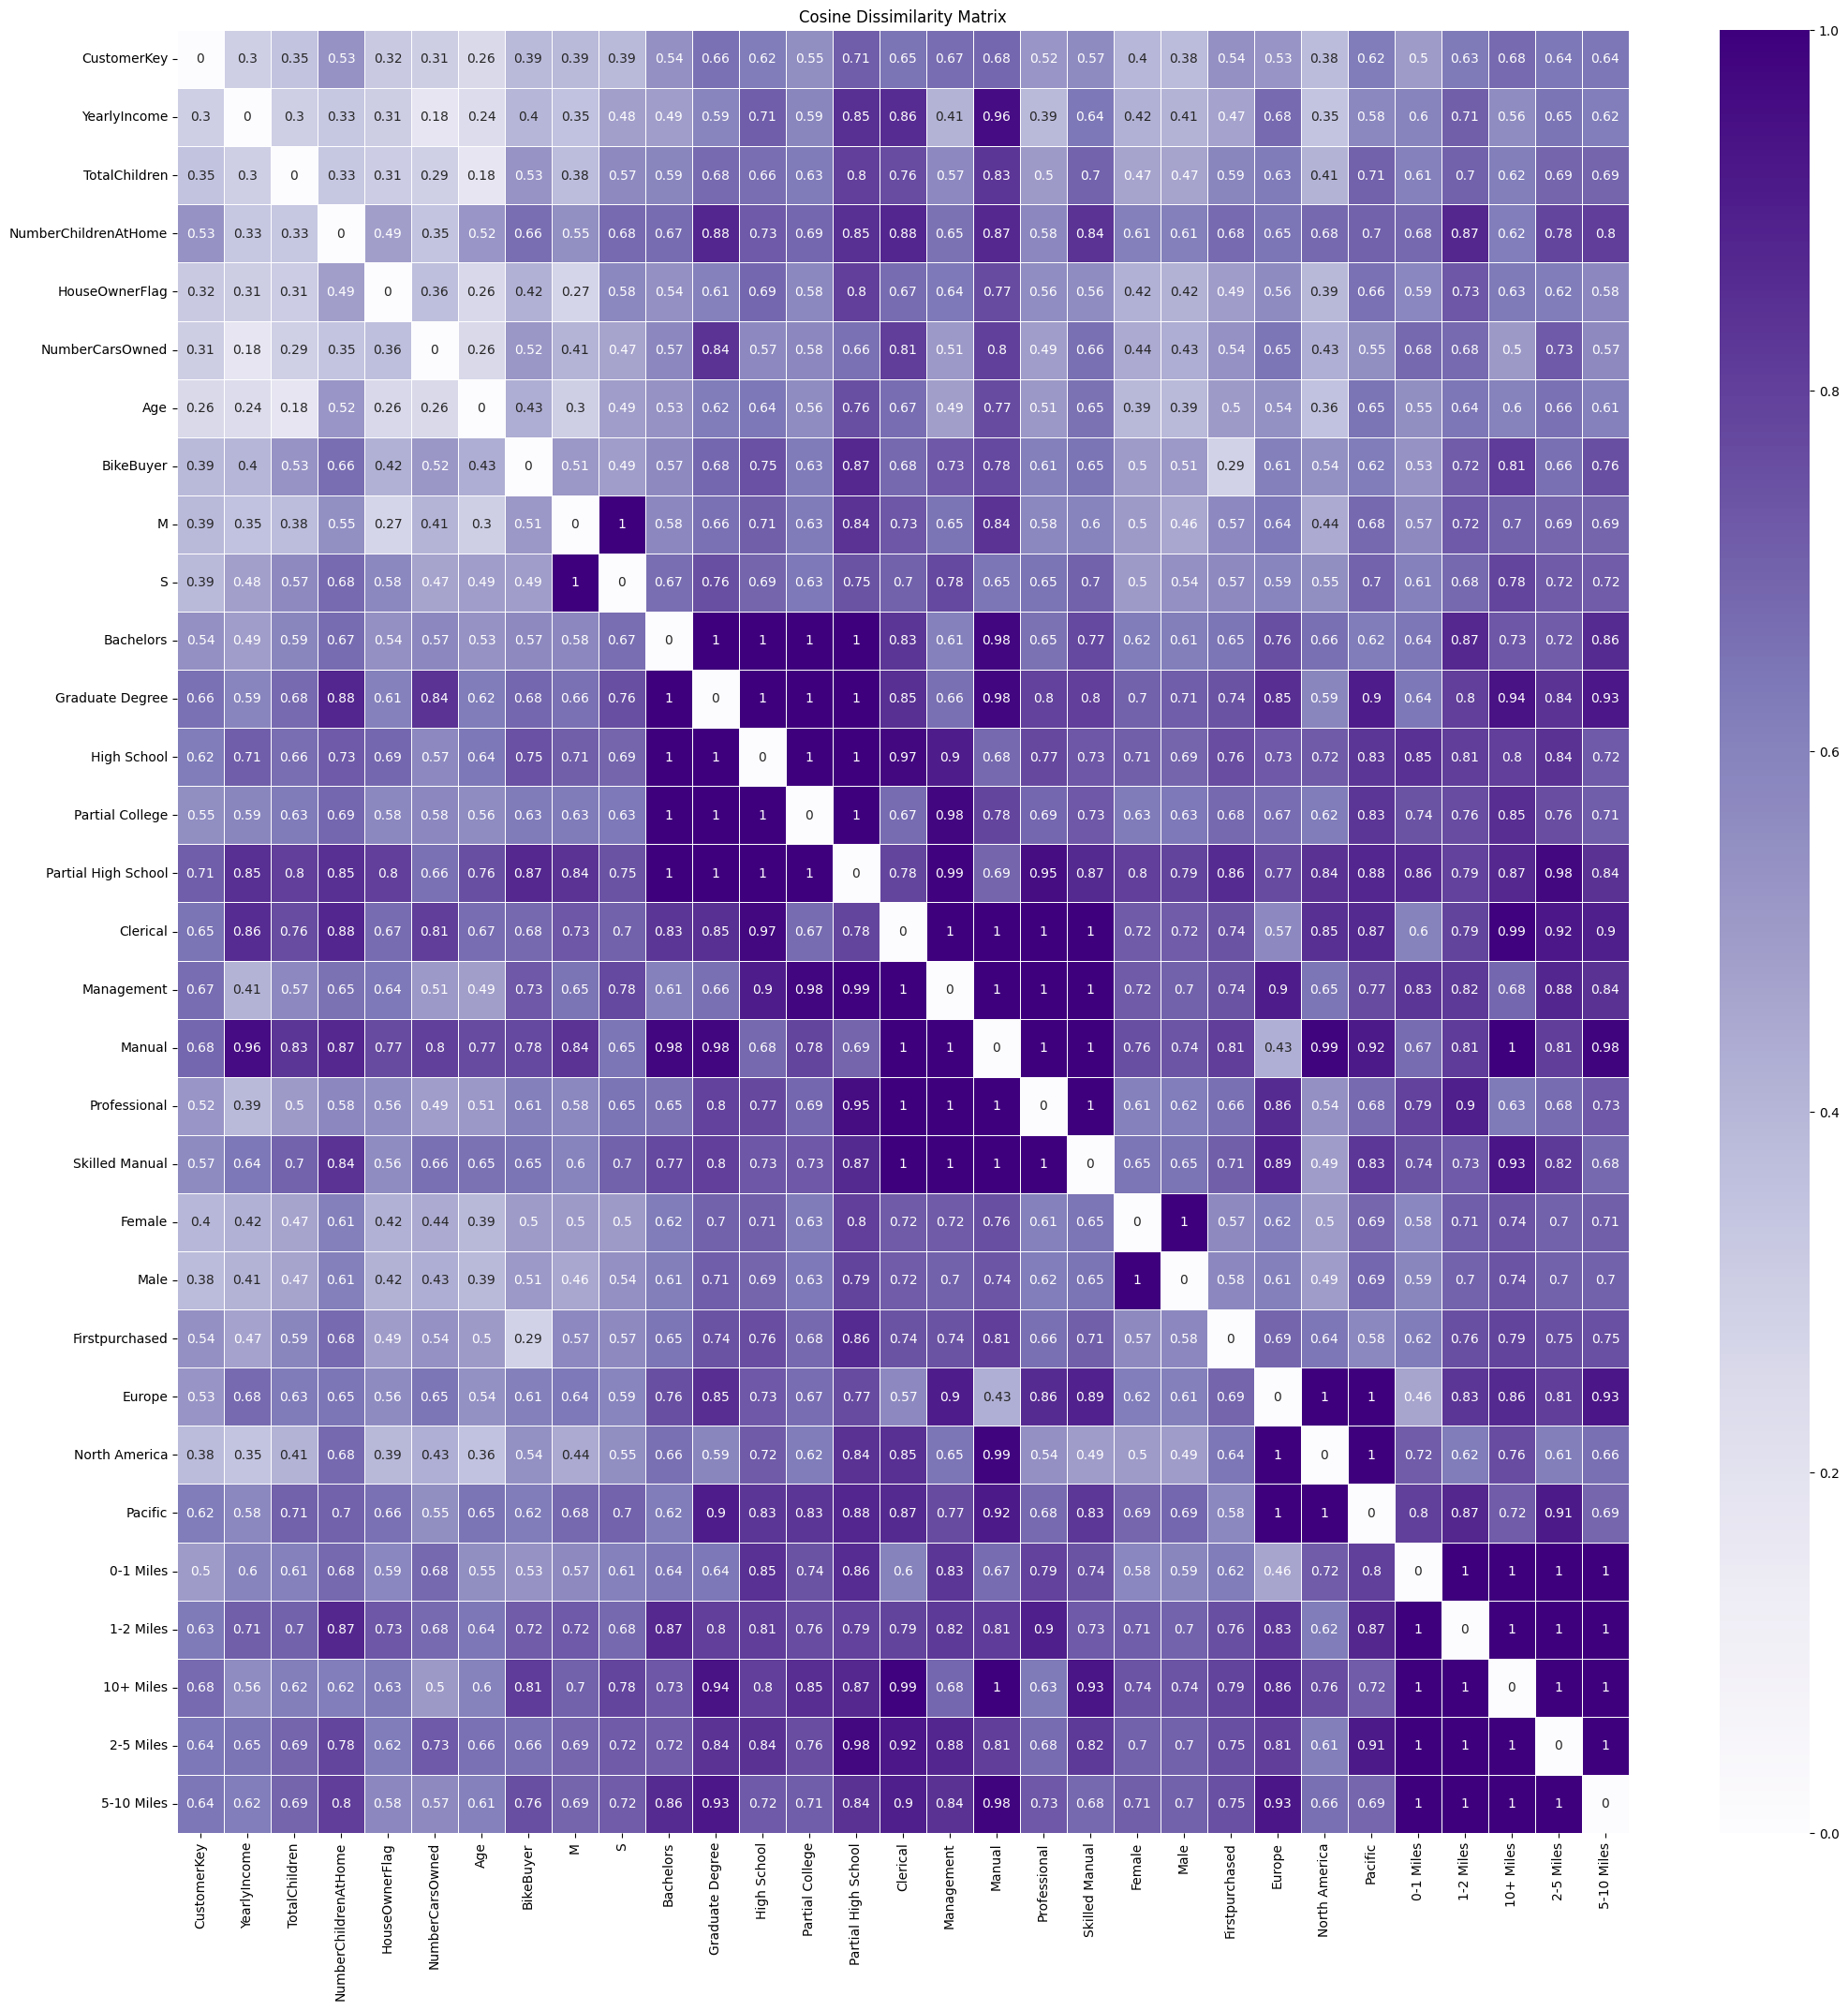

In [86]:
# Plotting the heatmap for the dissimilarity matrix
plt.figure(figsize=(25, 25))
sns.heatmap(dissimilarity_df, annot=True, cmap='Purples', linewidths=0.5)
plt.title("Cosine Dissimilarity Matrix")
plt.show()

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vTargetBuyerBinarization.csv', encoding='latin1')

# Drop rows with NaN values
df = df.dropna()

# Normalize the data to ensure values are within a reasonable range
normalized_data = (df - df.min()) / (df.max() - df.min())

# Function to calculate cosine similarity between two lists
def cosine_similarity(x, y):
    if np.linalg.norm(x) == 0 or np.linalg.norm(y) == 0:
        return 0  # Return 0 if either vector has zero magnitude
    return 1 - distance.cosine(x, y)

# Get the column names of the DataFrame
columns = normalized_data.columns

# Initialize the dissimilarity matrix with zeros
dissimilarity_matrix = [[0] * len(columns) for _ in range(len(columns))]

# Calculate cosine dissimilarities and fill in the matrix
for i in range(len(columns)):
    for j in range(i, len(columns)):
        if i == j:
            dissimilarity_matrix[i][j] = 0.0  # Dissimilarity with itself is 0
        else:
            x = normalized_data[columns[i]].tolist()
            y = normalized_data[columns[j]].tolist()
            similarity = cosine_similarity(x, y)
            dissimilarity = 1 - similarity
            dissimilarity_matrix[i][j] = dissimilarity
            dissimilarity_matrix[j][i] = dissimilarity  # Dissimilarity matrix is symmetric

# Creating a DataFrame from the dissimilarity matrix with column and row labels
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, columns=columns, index=columns)

# Mask the upper triangle, excluding the diagonal
mask = np.triu(np.ones_like(dissimilarity_df, dtype=bool), k=1)
print(dissimilarity_df)


,CustomerKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age,BikeBuyer,M,S,...,Male,Firstpurchased,Europe,North America,Pacific,0-1 Miles,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles
CustomerKey,0.000000,0.300390,0.350005,0.531589,0.323263,0.307974,0.257205,0.389227,0.386899,0.387328,...,0.379163,0.541703,0.526625,0.381597,0.621207,0.497273,0.630785,0.679617,0.639211,0.641964
YearlyIncome,0.300390,0.000000,0.298038,0.332520,0.306045,0.182770,0.241329,0.401971,0.352560,0.483790,...,0.413292,0.472176,0.678095,0.346178,0.581812,0.595395,0.707638,0.558710,0.650480,0.618631
TotalChildren,0.350005,0.298038,0.000000,0.332114,0.311282,0.294405,0.178949,0.530346,0.375021,0.567353,...,0.466795,0.587627,0.626545,0.411263,0.706242,0.607738,0.699441,0.615584,0.691772,0.693357
NumberChildrenAtHome,0.531589,0.332520,0.332114,0.000000,0.485133,0.347350,0.523385,0.664542,0.549822,0.676232,...,0.609983,0.679682,0.648376,0.680836,0.702409,0.681479,0.874300,0.621025,0.781724,0.804947
HouseOwnerFlag,0.323263,0.306045,0.311282,0.485133,0.000000,0.364366,0.259724,0.418903,0.270249,0.578516,...,0.416869,0.494055,0.563204,0.391777,0.658376,0.585898,0.734135,0.630724,0.623658,0.577370
NumberCarsOwned,0.307974,0.182770,0.294405,0.347350,0.364366,0.000000,0.256163,0.517410,0.406852,0.467417,...,0.430901,0.537527,0.645195,0.429588,0.553162,0.680889,0.678267,0.504759,0.725912,0.569387
Age,0.257205,0.241329,0.178949,0.523385,0.259724,0.256163,0.000000,0.429714,0.297704,0.490441,...,0.387523,0.500944,0.544429,0.355287,0.651177,0.554527,0.644364,0.602932,0.658333,0.606499
BikeBuyer,0.389227,0.401971,0.530346,0.664542,0.418903,0.517410,0.429714,0.000000,0.513565,0.490583,...,0.509244,0.285317,0.611791,0.543742,0.623681,0.533920,0.718558,0.809737,0.661601,0.756718
M,0.386899,0.352560,0.375021,0.549822,0.270249,0.406852,0.297704,0.513565,0.000000,1.000000,...,0.455732,0.573058,0.635827,0.443558,0.680943,0.568692,0.724869,0.699404,0.688222,0.692895
S,0.387328,0.483790,0.567353,0.676232,0.578516,0.467417,0.490441,0.490583,1.000000,0.000000,...,0.541072,0.568556,0.589947,0.552116,0.695795,0.605851,0.681447,0.784203,0.721090,0.717924


## Visualization of lower triangluar dissimilarity matrix using cosine (including diagonal)


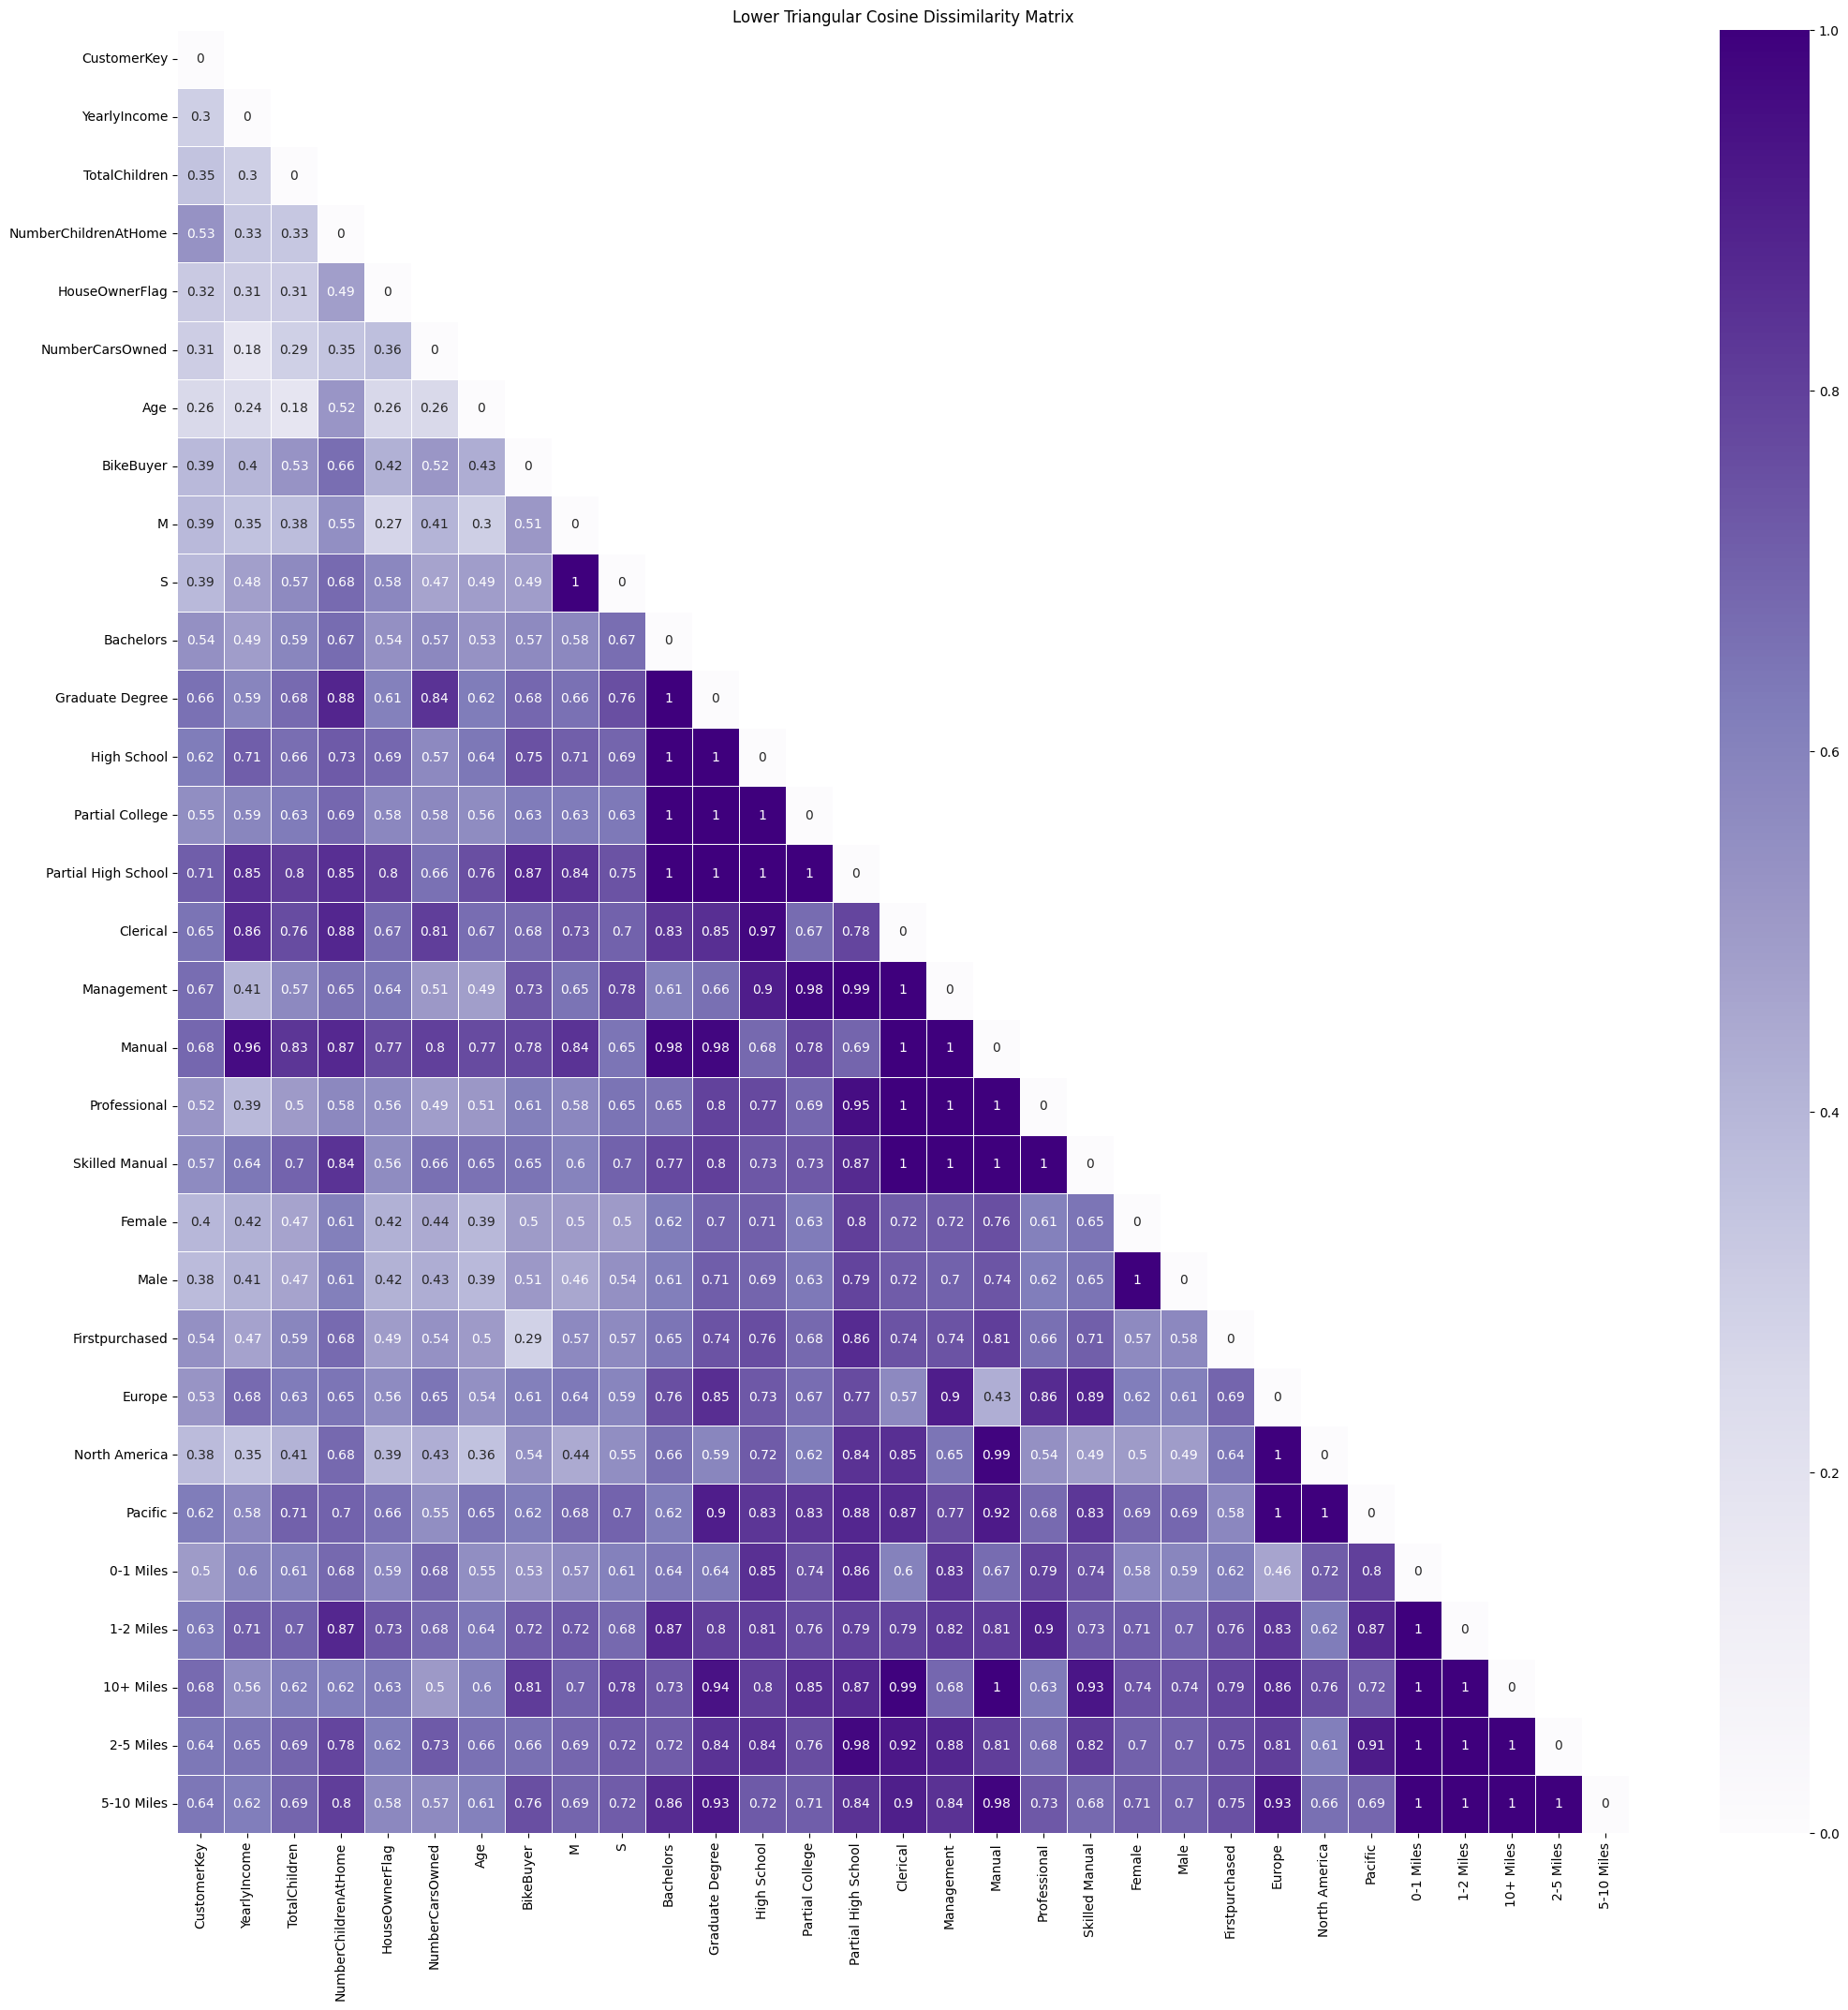

In [89]:
# Plotting the heatmap for the lower triangular dissimilarity matrix with purple and violet colors
plt.figure(figsize=(25, 25))
sns.heatmap(dissimilarity_df, annot=True, cmap='Purples', linewidths=0.5, mask=mask)
plt.title("Lower Triangular Cosine Dissimilarity Matrix")
plt.show()